<h1> INTRODUCTION</h1>
<p>Kelompok :<br>
- Jeta Nanda Manggala Halim <br>
- Latrisha Mintarya <br>
- Callista Angie <br>
- Steven <br>
- Mikhael Mario
</p>


In [ ]:
#Imports
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import metrics 

In [ ]:
df = pd.read_csv("./Spotify 2010 - 2019 Top 100.csv")
display(df) 

FileNotFoundError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1000 non-null   object 
 1   artist         1000 non-null   object 
 2   top genre      1000 non-null   object 
 3   year released  1000 non-null   float64
 4   added          1000 non-null   object 
 5   bpm            1000 non-null   float64
 6   nrgy           1000 non-null   float64
 7   dnce           1000 non-null   float64
 8   dB             1000 non-null   float64
 9   live           1000 non-null   float64
 10  val            1000 non-null   float64
 11  dur            1000 non-null   float64
 12  acous          1000 non-null   float64
 13  spch           1000 non-null   float64
 14  pop            1000 non-null   float64
 15  top year       1000 non-null   float64
 16  artist type    1000 non-null   object 
dtypes: float64(12), object(5)
memory usage: 133.3+ KB


<h1> Preprocessing Data </h1>

In [ ]:
# PREPROCESSING
df = df.dropna() 
display(df)

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SICKO MODE,Travis Scott,hip hop,2018.0,2020‑06‑22,155.0,73.0,83.0,-4.0,12.0,45.0,313.0,1.0,22.0,86.0,2019.0,Solo
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019.0,2020‑06‑22,80.0,50.0,55.0,-9.0,80.0,41.0,190.0,23.0,7.0,85.0,2019.0,Solo
997,Boasty (feat. Idris Elba),Wiley,grime,2019.0,2020‑06‑22,103.0,77.0,89.0,-5.0,9.0,46.0,177.0,1.0,7.0,68.0,2019.0,Solo
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019.0,2020‑08‑20,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0,67.0,2019.0,Duo


<h1> Analyzing Data </h1>

<h3>Top 5 Artist Popularity 2010 - 2019</h3>

In [ ]:
artistPop = df.groupby("artist").pop.mean().reset_index()
artistSong = df.groupby("artist").size().reset_index()
artists = artistSong.merge(artistPop, on="artist")
artists.columns = ["artist", "songs" , "popularity"]
artists = artists.sort_values(by=['songs', 'popularity'], ascending = False).reset_index(drop=True)
#See the results
artists.head()

,artist,songs,popularity
0,Taylor Swift,21,75.380952
1,Drake,18,78.500000
2,Calvin Harris,18,77.333333
3,Ariana Grande,14,78.928571
4,Rihanna,14,77.071429


<h3> Artist Popularity in Treemap </h3>

In [ ]:
fig =px.treemap(artists,path=[px.Constant("Artist Popularity in Treemap"), 'artist'],
                values = 'songs',
                hover_data=['artist', 'popularity'], width=1500, height=800)
fig.show()


<h3> Music Popularity and Top Genre per year </h3>

In [ ]:
popYear = df.groupby("top year").pop.mean().reset_index() 
genreYear = df.groupby(['top year','top genre']).size().sort_values(ascending=False).reset_index(name='count')
genreYear = genreYear.loc[genreYear.groupby(['top year'])['count'].idxmax()].reset_index(drop=True)
display(popYear)

display(genreYear)

,top year,pop
0,2010.0,70.18
1,2011.0,73.05
2,2012.0,72.85
3,2013.0,73.81
4,2014.0,74.32
5,2015.0,75.28
6,2016.0,75.09
7,2017.0,77.81
8,2018.0,77.58
9,2019.0,78.43


,top year,top genre,count
0,2010.0,dance pop,42
1,2011.0,dance pop,45
2,2012.0,dance pop,37
3,2013.0,dance pop,37
4,2014.0,dance pop,39
5,2015.0,dance pop,38
6,2016.0,dance pop,48
7,2017.0,dance pop,25
8,2018.0,dance pop,28
9,2019.0,dance pop,22


In [ ]:
figLineChartTrendPop = px.line(popYear, x="top year", y="pop", title='Popularity Throughout the Year', text="pop", width = 1000, labels = {"pop":"Popularity", "top year": "Year"})
figLineChartTrendPop.update_traces(textposition="bottom right")
figLineChartTrendPop.update_layout(
    xaxis = dict(
        tickmode = 'linear'
    )
)
figLineChartTrendPop.show()

In [ ]:
figBarChartTopGenre = px.bar(genreYear, x='top year', y='count', color ="top genre", title="Top Genre 2010-2019", text_auto='.2s', width=1000)
figBarChartTopGenre.update_traces(textposition="outside")
figBarChartTopGenre.update_layout(
    xaxis = dict(
        tickmode = 'linear'
    )
)
figBarChartTopGenre.show()

<h3> Top 5 music genre per Year </h3>

Kita ingin tau per tahun perubahan genre karena top genre dance pop menurun

In [ ]:
genreYear1 = df.groupby(['top year','top genre']).size().sort_values(ascending=False).reset_index(name='count')
year = 2010
genrePerYear = genreYear1.loc[genreYear1['top year'] == year]
genrePerYear = genrePerYear.sort_values(by=['count'],ascending=False).reset_index(drop=True)
genrePerYear = genrePerYear.head(5)
year = year + 1
while year < 2020:
  temp = genreYear1.loc[genreYear1['top year'] == year]
  temp = temp.sort_values(by=['count'],ascending=False).reset_index(drop=True)
  temp = temp.head(5)
  genrePerYear = genrePerYear.append(temp, ignore_index = True)
  year = year + 1

display(genrePerYear)

,top year,top genre,count
0,2010.0,dance pop,42
1,2010.0,atl hip hop,11
2,2010.0,barbadian pop,5
3,2010.0,pop,4
4,2010.0,art pop,4
5,2011.0,dance pop,45
6,2011.0,contemporary country,5
7,2011.0,pop,4
8,2011.0,hip hop,3
9,2011.0,art pop,3


In [ ]:
figGenrePerYear = px.bar(genrePerYear, x='top year', y='count', color ="top genre", title="Top 5 Genre 2010-2019", text_auto='s', width=1500, height = 650, color_discrete_sequence=px.colors.qualitative.Light24)
figGenrePerYear.update_traces(textfont_size=12, textangle=0, cliponaxis=False)
figGenrePerYear.update_layout(
    xaxis = dict(
        tickmode = 'linear'
    )
)
figGenrePerYear.show()

<h3> Music Duration per Year </h3>

In [ ]:
durYear = df.groupby("top year").dur.mean().reset_index() #mean popularity by year
display(durYear)

,top year,dur
0,2010.0,226.45
1,2011.0,230.19
2,2012.0,226.38
3,2013.0,229.49
4,2014.0,227.90
5,2015.0,218.46
6,2016.0,219.86
7,2017.0,221.04
8,2018.0,208.79
9,2019.0,195.50


In [ ]:
figLineChartDuration = px.line(durYear, x="top year", y="dur", title='Duration Throughout the Year', text="dur", width = 1000, labels = {"dur":"Duration in second", "top year": "Year"})
figLineChartDuration.update_traces(textposition="bottom center")
figLineChartDuration.update_layout(
    xaxis = dict(
        tickmode = 'linear'
    )
)
figLineChartDuration.show()

<h3>kNN Classification</h3>

Klasifikasi lagu genre Pop atau bukan berdasarkan bpm,nrgy,dnce,dB,val,acous,spch

In [ ]:
df2 = df.copy(deep=True)
df2.loc[df2['top genre'].str.contains('pop', case=False), 'top genre'] = 'pop'
df2.loc[~df2['top genre'].str.contains('pop', case=False), 'top genre'] = 'other'
display(df2.head(10))
x_data = df2[['bpm', 'nrgy', 'dnce', 'dB', 'val', 'acous', 'spch']]
display(x_data.head())
y_data = df2['top genre']
display(y_data.head())


,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,other,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,other,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo
5,Magic (feat. Rivers Cuomo),B.o.B,other,2010.0,2022‑02‑17,82.0,93.0,55.0,-4.0,35.0,79.0,196.0,1.0,34.0,71.0,2010.0,Solo
6,The Time (Dirty Bit),Black Eyed Peas,pop,2010.0,2022‑02‑17,128.0,81.0,82.0,-8.0,60.0,44.0,308.0,7.0,7.0,75.0,2010.0,Band/Group
7,Imma Be,Black Eyed Peas,pop,2009.0,2022‑02‑17,92.0,52.0,60.0,-7.0,31.0,41.0,258.0,18.0,37.0,71.0,2010.0,Band/Group
8,Talking to the Moon,Bruno Mars,pop,2010.0,2022‑02‑17,146.0,59.0,50.0,-5.0,11.0,8.0,218.0,51.0,3.0,87.0,2010.0,Solo
9,Just the Way You Are,Bruno Mars,pop,2010.0,2022‑02‑17,109.0,84.0,64.0,-5.0,6.0,42.0,221.0,1.0,4.0,86.0,2010.0,Solo


,bpm,nrgy,dnce,dB,val,acous,spch
0,140.0,81.0,61.0,-6.0,23.0,0.0,6.0
1,138.0,89.0,68.0,-4.0,83.0,1.0,8.0
2,95.0,48.0,84.0,-7.0,96.0,20.0,3.0
3,93.0,87.0,66.0,-4.0,38.0,11.0,12.0
4,104.0,85.0,69.0,-6.0,74.0,39.0,5.0


0      pop
1      pop
2      pop
3    other
4    other
Name: top genre, dtype: object

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 0)
print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))
print()

There are 700 samples in the training set and 300 samples in the test set



In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print('After standardizing our features, the first 5 rows of our data now look like this:\n')
print(pd.DataFrame(X_train_std, columns=x_data.columns).head())

After standardizing our features, the first 5 rows of our data now look like this:

        bpm      nrgy      dnce        dB       val     acous      spch
0 -1.066408  0.332645 -0.149690  0.309186  0.663613 -0.308988 -0.108147
1  2.137723  1.320611 -1.630997  0.792290  0.195856 -0.712988 -0.537666
2  0.477752  0.888376  0.162164  0.309186  1.084594  0.297012  0.858271
3  0.246128  0.517888 -1.241180  1.275394 -1.534843 -0.510988 -0.322906
4  0.014504  0.332645  0.084201 -0.657021 -0.178349 -0.460488  0.536132


In [ ]:
model=KNeighborsClassifier(n_neighbors=15) #this examines 3 neighbours for putting the new data into a class
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,y_test))

The accuracy of the KNN is 0.6133333333333333


1 	 0.5666666666666667
2 	 0.5566666666666666
3 	 0.6
4 	 0.55
5 	 0.6
6 	 0.57
7 	 0.59
8 	 0.5833333333333334
9 	 0.5666666666666667
10 	 0.5666666666666667
11 	 0.59
12 	 0.5833333333333334
13 	 0.5933333333333334
14 	 0.5766666666666667
15 	 0.6133333333333333


([<matplotlib.axis.XTick at 0x7fa34358d790>,
 <a list of 15 Text major ticklabel objects>)

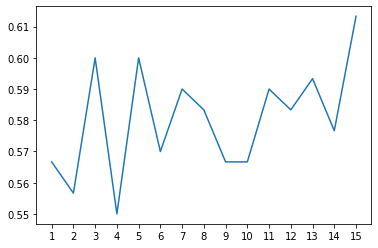

In [ ]:
import warnings
warnings.filterwarnings('ignore')
a_index=list(range(1,16))
a=pd.Series()
maxVal = 0;
maxIdx = 1;
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for i in list(range(1,16)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    temp = metrics.accuracy_score(prediction,y_test)
    print(i, '\t',temp)
    if temp > maxVal:
        maxIdx = i
        maxVal = temp
    a=a.append(pd.Series(temp))
plt.plot(a_index, a)
plt.xticks(x)


In [ ]:
print('The best number of neighbors is', maxIdx, 'with prediction accuracy', round(maxVal*100, 1), '%' )

The best number of neighbors is 15 with prediction accuracy 61.3 %
